## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

In [3]:
air = pd.read_csv('data/AirPassengers.csv', parse_dates = ['date'], index_col = 'date')
air.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior

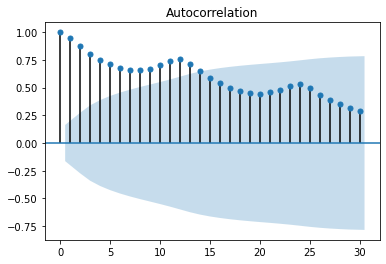

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(air['value'], lags=30);

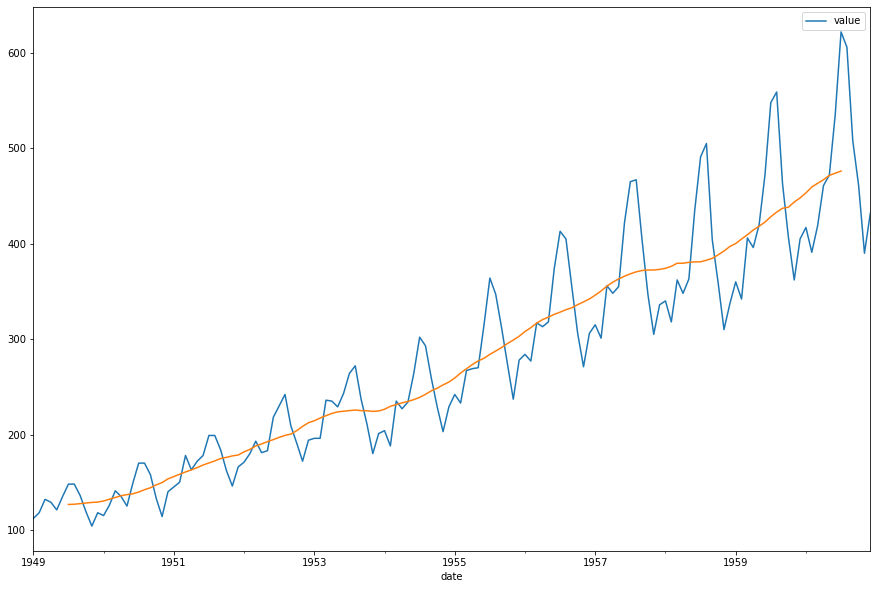

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(air['value'], model = 'additive', extrapolate_trend = 'freq')
mean = df_ma = air['value'].rolling(12, center= True, closed = 'both').mean()
air_plot = air.plot(figsize = (15,10), label = 'Series')
df_ma.plot(label = 'Mean');

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# CALCULAMOS EL TEST ROOT STATIONARY:

result_test = adfuller(air['value'].values, autolag = 'AIC')
result_test[1]
# SI ES < 0,05 LA SERIE ES ESTACIONARIA, SI ES SUPERIOR ES NO ESTACIONARIA


0.9918802434376409

## 4. Aplica una transformación logarítmica

In [7]:
air_log = np.log(air)
air_log

,value
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


## 5. Divide en train y test. Guarda 20 muestras para test.

In [8]:
X = air_log['value'].values
train = X[:-20]
test = X[-20:]
train

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
       4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989,
       4.90527478, 4.82831374, 5.00394631, 5.13579844, 5.13579844,
       5.06259503, 4.89034913, 4.73619845, 4.94164242, 4.97673374,
       5.01063529, 5.18178355, 5.0937502 , 5.14749448, 5.18178355,
       5.29330482, 5.29330482, 5.21493576, 5.08759634, 4.98360662,
       5.11198779, 5.14166356, 5.19295685, 5.26269019, 5.19849703,
       5.20948615, 5.38449506, 5.43807931, 5.48893773, 5.34233425,
       5.25227343, 5.14749448, 5.26785816, 5.27811466, 5.27811466,
       5.46383181, 5.45958551, 5.433722  , 5.49306144, 5.5759491 ,
       5.60580207, 5.46806014, 5.35185813, 5.19295685, 5.30330491,
       5.31811999, 5.23644196, 5.45958551, 5.42495002, 5.45532112,
       5.5759491 , 5.71042702, 5.68017261, 5.55682806, 5.433722  ,
       5.31320598, 5.433722  , 5.48893773, 5.45103845, 5.58724

In [9]:
print(train.shape)
print(test.shape)

(124,)
(20,)


## 6. Crea tu primer modelo ARIMA

In [42]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

air_model = auto_arima(train,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                   seasonal = True,
                    trace=True,
                    stepwise=True)

print(air_model.aic())

predictions = air_model.predict(20)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-403.244, Time=1.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-408.703, Time=1.04 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-382.319, Time=0.38 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-406.714, Time=1.45 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-402.096, Time=0.87 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=-404.767, Time=2.95 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.954, Time=0.82 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-382.629, Time=0.20 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-407.173, Time=0.97 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-407.811, Time=2.14 sec
 ARIMA(1,0,2)(1,1,0

## 7. Representa en una gráfica los datos de test y tus predicciones.

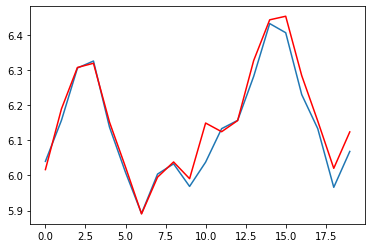

In [43]:
plt.plot(test)
plt.plot(predictions, color ='red')

## 8. Prueba otros modelos, a ver qué performance presentan.

In [ ]:
for i in range(12, 0, -1):
    air['t-' + str(i)] = air['value']

In [ ]:
air.dropna(inplace=True)
air.head()

In [ ]:
X = air.iloc[:,1:].values
Y = air.iloc[:,0].values

X_train = X[:-20]
X_test = X[-20:]

Y_train = Y[:-20]
Y_test = Y[-20:]

In [ ]:

from sklearn.tree import DecissionTreeRegressor

tree = DecissionTreeRegressor()

tree.fit(X_train, Y_train)

print("mean_squared_error:", mean_squared_error(tree.predict(X_test), y_test))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(tree.predict(X_test), y_test)))
